## 13.3. Pillow 사용법

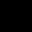

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

In [5]:
type(image)

PIL.Image.Image

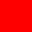

In [7]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

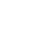

In [8]:
data = np.zeros([32, 32, 3], dtype=np.uint8)
data[:,:] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image.show()

In [11]:
#- 문제 2 -#
from PIL import Image
import os

image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'

img = Image.open(image_path)
print(img.width)
print(img.height)
img2 = img.convert('RGB')
img2.save('13/result/pillow_practice.jpg')

620
465


In [12]:
type(img)

PIL.PngImagePlugin.PngImageFile

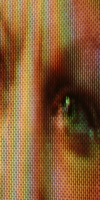

In [13]:
img3 = img.resize((100,200))
img3.show()


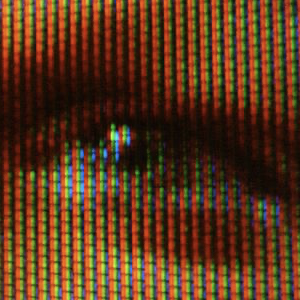

In [15]:
img4 = img.crop((300, 100, 600, 400))
img4 = img4.convert('RGB')
img4.show()
img4.save('13/result/pillow_practice4.jpg')

## 13.4. Pillow를 활용한 데이터 전처리

In [16]:
import os
import pickle
from PIL import Image

train_file_path = '13/data/cifar-100-python/train'

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
#print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>


In [17]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [18]:
type(train[b'filenames'])

list

In [19]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [20]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [21]:
train[b'data'][0].shape

(3072,)

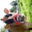

In [22]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

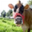

In [23]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [24]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))



100%|██████████| 50000/50000 [00:33<00:00, 1496.48it/s]
